In [2]:
import matplotlib.pyplot as plt
import numpy as np
import math
import os

In [3]:
logfolderpath = "D:\\Games\\steamapps\\common\\Kerbal Space Program\\Ships\\Script\\logs\\"
logFileExt = ".txt"

fileName = "flightlog_5"

In [5]:
def parseData(rawData) :
    listData = []
    firstLine = True
    
    lines = rawData.split(" nl ")
    for line in lines :
        data = line.split(",")
        if firstLine == True :
            for d in range(len(data)) :
                listData.append([])
                listData[d].append(data[d])
                firstLine = False
        else :
            for d in range(len(data)) :
                listData[d].append(data[d])
        
    return listData
    

In [6]:
with open(logfolderpath + fileName + logFileExt) as file :
    rawData = file.read()
    data = parseData(rawData)
    
    #for i in range(len(data)) :
    #    print(data[i])
    #    print(len(data[i]))


In [7]:
class LogFile :
    name = ""
    logs = []
    allLogs = []
    
    def __init__(self, name, allLogs, logs) :
        self.name = name
        self.logs = logs
        self.allLogs = allLogs
        
    def addLog(self, log) :
        self.logs.append(log)
        
    def StructureData(self) :
        for d in self.allLogs :
            temp = Log(d)
            temp.Clean()
            self.addLog(temp)
            
    def getVAcceleration(self) :
        speedData = self.logs[1].data
        accData = []
        for x in range(len(speedData)) :
            if x > 0 :
                acc = (speedData[x] - speedData[x - 1]) / 2
                accData.append(acc)
        return accData
    
    def calcAlt_VSpeed(self) :
        speed = self.logs[1].data
        alt = self.logs[0].data
        diff_output = []
        
        for i in range(len(speed)) :
            diff_output.append(speed[i] - alt[i])
            
        return diff_output
    
    def calcAlt_Apo(self) :
        apo = self.logs[7].data
        alt = self.logs[0].data
        diff_output = []
        
        for i in range(len(apo)) :
            diff_output.append(apo[i] - alt[i])
            
        return diff_output
    
    def calcDeriv(self, index) :
        data = self.logs[index].data
        output = []
        for x in range(len(data)) :
            if x > 0 :
                output.append((data[x] - data[x - 1]) / 1)
        return output

In [8]:
class Log :
    name = ""
    rawData = []
    data = []
    
    def __init__(self, rawData) :
        self.rawData = rawData
        
    def Clean(self) :
        self.removeEmpty()
        self.parseNumbers()
    
    def removeEmpty(self) :
        output = []
        self.name = self.rawData.pop(0)
        for d in self.rawData :
            if type(d) == str :
                if d != '' :
                    output.append(d)
        
        self.data = output
    
    def parseNumbers(self) :
        output = []
        try :
            for d in self.data :
                if type(d) == str :
                    output.append(float(d))
                elif type(d) == float :
                    output.append(d)
            self.data = output
        except :
            print("Unable to convert {}".format(self.name))
            
    def ToString(self) :
        print("Name : {}".format(self.name))
        print("Raw Data : {}".format(self.rawData))
        print("Data : {}".format(self.data))
        
    

In [9]:
logFile = LogFile(fileName, data, [])

In [10]:
logFile.StructureData()

In [11]:
vAcceleration = logFile.getVAcceleration()
calcOutput = logFile.calcDeriv(0)

In [12]:
def setLabels(axis):
    axis.set_title("Flight Log : {}".format(logFile.name))
    axis.set_xlabel("Time")
    axis.set_ylabel("Value")
    axis.legend()
    
def plotAll(axis) :
    for d in logFile.logs :
        axis_A.plot(range(len(d.data)), d.data, label=d.name)
        
def plotByIndex(index, file) :
    axis_A.plot(range(len(file.logs[index].data)), file.logs[index].data, label=file.logs[index].name)

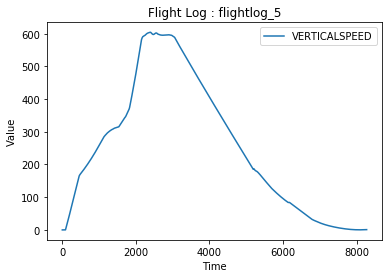

In [13]:
figure_A, axis_A = plt.subplots()
#plotAll(axis_A)
plotByIndex(1, logFile)
#axis_A.plot(range(len(vAcceleration)), vAcceleration, label="VAcc")
setLabels(axis_A)

In [64]:
def testFunc(m, func) :
    data = []
    for x in range(m):
        data.append(func(x,m))
    return data

def doubleTestFunc(a, b, func) :
    data = []
    for x in range(len(a)) :
        data.append(func(a[x],b[x]))
    return data

def function_A(x,y) :
    return math.pow(x, 5) * math.pow(10, -16.1)

def function_B(x,y) :
    return math.cos(math.radians(math.pow(x, 0.01))) * math.pow(10, -4)
    #return math.sin(math.radians(math.pow(x, 0.4) )) * math.pow(10, 1)
    
def function_C(x,y) :
    return math.sin(math.radians(math.pow(x, 0.2))) * 0.00001

def compare(x,y) :
    if x != 0 :
        return (x + y) * x
    else : return 0

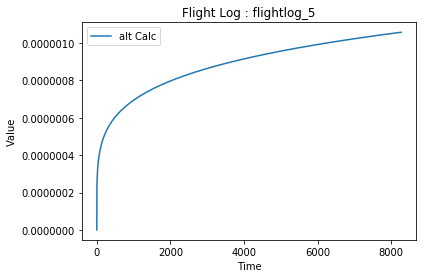

In [65]:
aprox_output_A = testFunc(len(logFile.logs[1].data), function_A)
aprox_output_B = testFunc(len(logFile.logs[1].data), function_B)
aprox_output_C = testFunc(len(logFile.logs[1].data), function_C)
aprox_AB = doubleTestFunc(aprox_output_A, aprox_output_B, compare)

figure_aproxGSpeed, axis_aproxGSpeed = plt.subplots()
#axis_aproxGSpeed.plot(range(len(aprox_output_A)), aprox_output_A, label="G Speed")
#axis_aproxGSpeed.plot(range(len(aprox_output_B)), aprox_output_B, label="V Speed")
axis_aproxGSpeed.plot(range(len(aprox_output_C)), aprox_output_C, label="alt Calc")
#axis_aproxGSpeed.plot(range(len(aprox_AB)), aprox_AB, label="G - V Speeds")

setLabels(axis_aproxGSpeed)

In [117]:
def iterAltitude(alt) :
    output = []
    for x in range(alt) :
        output.append(formula_1(x))
    return output

def formula_1(alt) :
    return math.radians(math.sin(math.pow(alt, 0.1))) * alt * 10

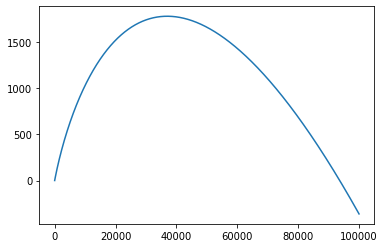

In [121]:
figure_altBased, axis_altBased = plt.subplots()
#axis_altBased.plot(range(80000), range(80000))
axis_altBased.plot(range(100000), iterAltitude(100000))

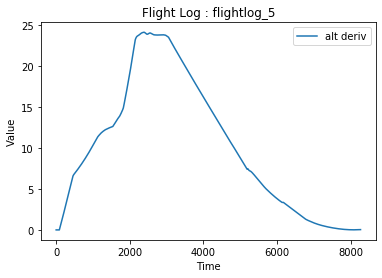

In [63]:
figure_VAcc, axis_VAcc = plt.subplots()
axis_VAcc.plot(range(len(calcOutput)), calcOutput, label="alt deriv")
setLabels(axis_VAcc)

In [89]:
altitudeData = Log(data[0])
print(altitudeData.ToString())
altitudeData.Clean()
print(altitudeData.ToString())
logFile.addLog(altitudeData)

Name : 
Raw Data : ['87.0388528993353', '87.0388532567304', '109.779553825618', '280.539298097719', '559.384905044688', '933.269302734989', '1403.91400294798', '1973.29101556726', '2643.18934939464', '3412.89167898847', '4283.55327355047', '5257.89266624057', '6328.12443551293', '7471.84673483402', '8691.19537496194', '9989.944623905', '11371.5602139935', '12838.7028877232', '14392.4088154294', '16032.8598506518', '17748.0377288866', '19528.4506124388', '21372.3572484556', '23283.5669141856', '25259.6083491467', '27304.8378869842', '29419.4153932563', '31605.5958112577', '33865.8435672543', '36169.3202966505', '38441.0731994344', '40678.9883300019', '42883.650760387', '45055.8190489503', '47195.9651590751', '49305.0059590088', '51391.891061457', '53463.9424328521', '55535.645811458', '57622.7591835283', '59722.0498426982', '61831.4063272313', '63949.1311503159', '66062.3603254857', '68157.0773001336', '70232.6138228832', '72289.7310460943', '74328.9466970081', '76350.9294374903', '7835

In [10]:
vSpeedData = Log(data[1])
print(vSpeedData.ToString())
vSpeedData.Clean()
print(vSpeedData.ToString())
logFile.addLog(vSpeedData)

Name : 
Raw Data : ['vSpeed', '0.00289853796766693', '0.002898859729072', '15.1285762521806', '106.441736386538', '201.795950931999', '301.326286663608', '404.3985238055', '511.553999368862', '625.576164246734', '747.293718657081', '876.834014954366', '1015.58746750693', '1165.47628562776', '1328.47553230221', '1505.82667608032', '1521.08663527967', '1499.69082022266']
Data : []
None
Name : vSpeed
Raw Data : ['0.00289853796766693', '0.002898859729072', '15.1285762521806', '106.441736386538', '201.795950931999', '301.326286663608', '404.3985238055', '511.553999368862', '625.576164246734', '747.293718657081', '876.834014954366', '1015.58746750693', '1165.47628562776', '1328.47553230221', '1505.82667608032', '1521.08663527967', '1499.69082022266']
Data : [0.00289853796766693, 0.002898859729072, 15.1285762521806, 106.441736386538, 201.795950931999, 301.326286663608, 404.3985238055, 511.553999368862, 625.576164246734, 747.293718657081, 876.834014954366, 1015.58746750693, 1165.47628562776, 1

In [12]:
apoapsisData = Log(data[2])
print(apoapsisData.ToString())
apoapsisData.Clean()
print(apoapsisData.ToString())
logFile.addLog(apoapsisData)

Name : 
Raw Data : ['apoapsis', '79.9824908826267', '79.9824910938041', '94.4971504844725', '786.051076255622', '2610.33998805552', '5720.75223971566', '10269.306951088', '16474.1375793361', '24783.5665779763', '35718.9430202963', '49912.1857902956', '68361.2229680506', '92597.7994287641', '124961.528014751', '168976.834347905', '177693.379926261', '176875.458817627']
Data : []
None
Name : apoapsis
Raw Data : ['79.9824908826267', '79.9824910938041', '94.4971504844725', '786.051076255622', '2610.33998805552', '5720.75223971566', '10269.306951088', '16474.1375793361', '24783.5665779763', '35718.9430202963', '49912.1857902956', '68361.2229680506', '92597.7994287641', '124961.528014751', '168976.834347905', '177693.379926261', '176875.458817627']
Data : [79.9824908826267, 79.9824910938041, 94.4971504844725, 786.051076255622, 2610.33998805552, 5720.75223971566, 10269.306951088, 16474.1375793361, 24783.5665779763, 35718.9430202963, 49912.1857902956, 68361.2229680506, 92597.7994287641, 124961

In [13]:
stageData = Log(data[3])
print(stageData.ToString())
stageData.Clean()
print(stageData.ToString())
logFile.addLog(stageData)

Name : 
Raw Data : ['stage', '5', '5', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4']
Data : []
None
Name : stage
Raw Data : ['5', '5', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4']
Data : [5.0, 5.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0]
None


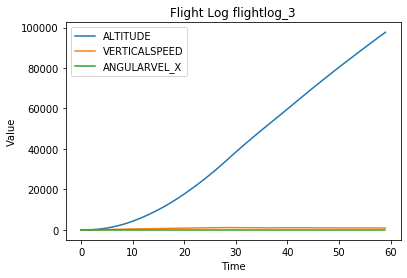

In [95]:
figure_A, axis_A = plt.subplots()
axis_A.plot(range(len(logFile.logs[0].data)), logFile.logs[0].data, label=logFile.logs[0].name)
axis_A.plot(range(len(logFile.logs[1].data)), logFile.logs[1].data, label=logFile.logs[1].name)
axis_A.plot(range(len(logFile.logs[2].data)), logFile.logs[2].data, label=logFile.logs[2].name)
#axis_A.plot()

setLabels(axis_A)

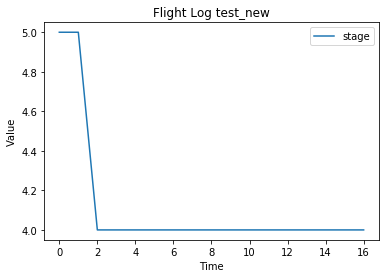

In [21]:
figure_B, axis_B = plt.subplots()
axis_B.plot(range(len(logFile.logs[3].data)), logFile.logs[3].data, label=logFile.logs[3].name)

setLabels(axis_B)